### <b>Question No. 1</b>

The mathematical formula for a linear Support Vector Machine (SVM) can be represented as:

f(x) = w · x + b

where:
- f(x) is the decision function that maps input x to a decision value,
- w is the weight vector perpendicular to the hyperplane,
- b is the bias term, and
- x is the input feature vector.

In binary classification, the predicted class ŷ for an input x is determined by the sign of f(x), such that:
- ŷ = +1 if f(x) ≥ 0,
- ŷ = -1 if f(x) < 0.

### <b>Question No. 2</b>

The objective function of a linear Support Vector Machine (SVM) is to maximize the margin between the two classes while minimizing the classification error. Mathematically, this can be formulated as:

minimize 1/2 ||w||^2

subject to the constraints:

y_i (w · x_i + b) ≥ 1 for all i,

where:
- w is the weight vector perpendicular to the hyperplane,
- b is the bias term,
- x_i is the ith data point,
- y_i is the class label of the ith data point (+1 or -1), and
- ||w|| is the Euclidean norm of the weight vector.

The objective is to find the optimal w and b that minimize the norm of the weight vector while correctly classifying as many data points as possible with a margin of at least 1.

### <b>Question No. 3</b>

The kernel trick in Support Vector Machines (SVM) is a method used to implicitly map input data into a higher-dimensional space without explicitly computing the new high-dimensional representation. This is achieved by using a kernel function, which calculates the dot product of the transformed input vectors in the higher-dimensional space without actually transforming the data.

In simple terms, the kernel trick allows SVM to effectively find complex, nonlinear decision boundaries by transforming the data into a space where the classes are more easily separable, without the need to explicitly compute the transformed feature space. This makes the SVM algorithm computationally efficient and allows it to handle nonlinearities in the data.

### <b>Question No. 4</b>

In Support Vector Machines (SVM), support vectors are the data points that lie closest to the decision boundary (hyperplane) between the two classes. These points are crucial in defining the decision boundary because they determine the orientation and position of the hyperplane. Support vectors are the data points that, if removed, would alter the position of the decision boundary, meaning they are critical for the SVM model.

Support vectors play a significant role in SVM because they define the margin, which is the distance between the decision boundary and the closest data points from either class. Maximizing this margin is the key objective of SVM, as it helps improve the generalization of the model to unseen data.

Example:
Consider a simple binary classification problem with two classes, represented by circles and crosses in a two-dimensional space. The goal is to find a linear decision boundary (hyperplane) that separates the two classes. In the image below, the solid line represents the decision boundary, and the dashed lines represent the margin, with the support vectors marked as bold points.

In this example, the support vectors are the points that lie on the margin or are misclassified, as they have the most influence on the position and orientation of the decision boundary. The other points in the dataset, which are not support vectors, do not affect the decision boundary as much.

### <b>Question No. 5</b>

Here's a visual illustration of the concepts using a synthetic dataset:

1. **Hyperplane:** The solid line represents the hyperplane that separates the two classes.
2. **Margin:** The dashed lines represent the margin, which is maximized in SVM.
3. **Support Vectors:** The circled points are the support vectors, which are the data points closest to the hyperplane.

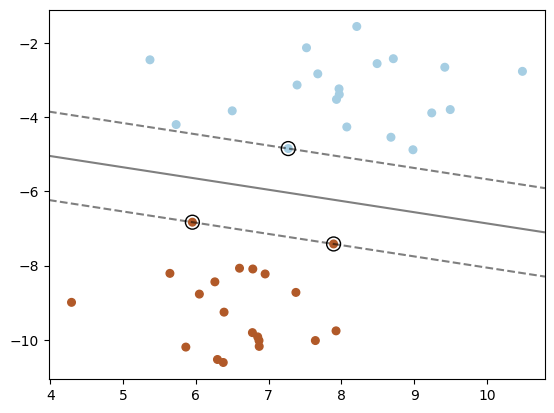

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

# Generate synthetic data
X, y = datasets.make_blobs(n_samples=40, centers=2, random_state=6)

# Fit the SVM model
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision boundary and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In this example, the solid line is the decision boundary (hyperplane), the dashed lines represent the margins, and the circled points are the support vectors.

### <b>Question No. 6</b>

Accuracy: 0.8


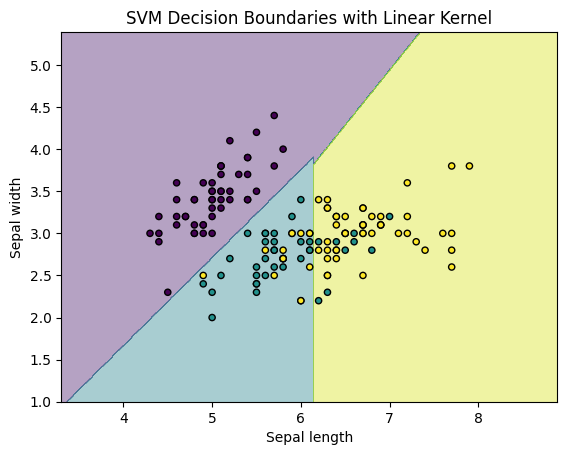

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a linear SVM classifier
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundaries of the trained model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries with Linear Kernel')
plt.show()


Accuracy: 0.8


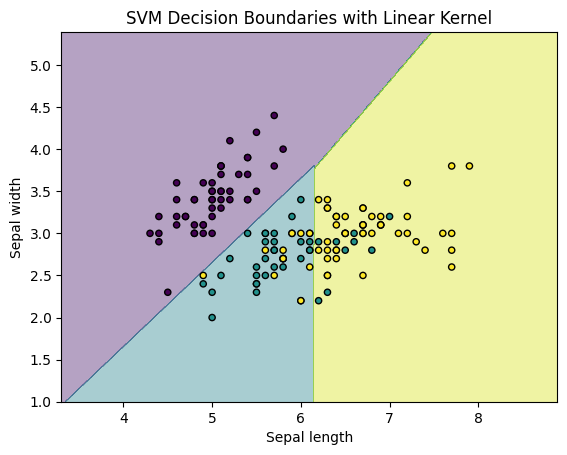

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a linear SVM classifier
clf = SVC(kernel='linear', C=2)
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundaries of the trained model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries with Linear Kernel')
plt.show()


Accuracy: 0.8


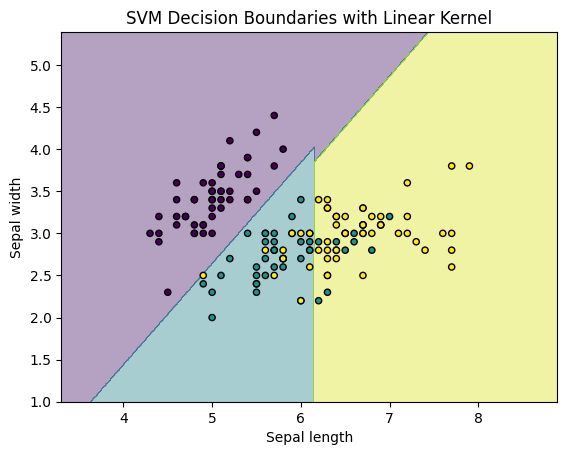

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a linear SVM classifier
clf = SVC(kernel='linear', C=20)
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundaries of the trained model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries with Linear Kernel')
plt.show()
